In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [11]:
frames = []
usernames = ["JustinTrudeau","ElizabethMay","AndrewScheer","MaximeBernier","theJagmeetSingh"]
colours = ['r','g','b','purple','orange']
for username in usernames:
    file_path = "../data/{}_data.csv".format(username)
    timeline_df = pd.read_csv(file_path)
    frames.append(timeline_df)
total_df = pd.concat(frames,sort=False)  
total_df.head(3)  

,id,created_at,source,favorite_count,retweet_count,original_author,type,clean_text,original_text,lda_cluster
0,1186063209381486593,Sun Oct 20 23:34:39 +0000 2019,"<a href=""https://studio.twitter.com"" rel=""nofo...",9220,3189,JustinTrudeau,tweet,andrew scheer gay marriage woman right choose ...,"Andrew Scheer is against gay marriage, against...",3
1,1186062450686337024,Sun Oct 20 23:31:38 +0000 2019,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1553,295,JustinTrudeau,tweet,lower tax everyone except,For lower taxes for everyone except the 1%. #C...,1
2,1186055621684187136,Sun Oct 20 23:04:30 +0000 2019,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1301,445,JustinTrudeau,tweet,choice clear real plan make life affordable vo...,The choice is clear. For a real plan to make l...,1


In [12]:
total_df["Date"] = pd.to_datetime(total_df['created_at']).dt.date
tweets_over_time = total_df[["Date","created_at"]]
tweets_over_time["Cumulative"] = total_df["created_at"]
tweets_over_time = tweets_over_time.drop("created_at",axis=1)
tweets_over_time = tweets_over_time.groupby(tweets_over_time["Date"]).count()
cumulative_tweets = tweets_over_time["Cumulative"].cumsum()
cumulative_tweets.head()

/Users/student/Desktop/School/CISC500/sourceCode/thesisEnv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date
2018-10-21      6
2018-10-22     24
2018-10-23     50
2018-10-24     82
2018-10-25    107
Name: Cumulative, dtype: int64

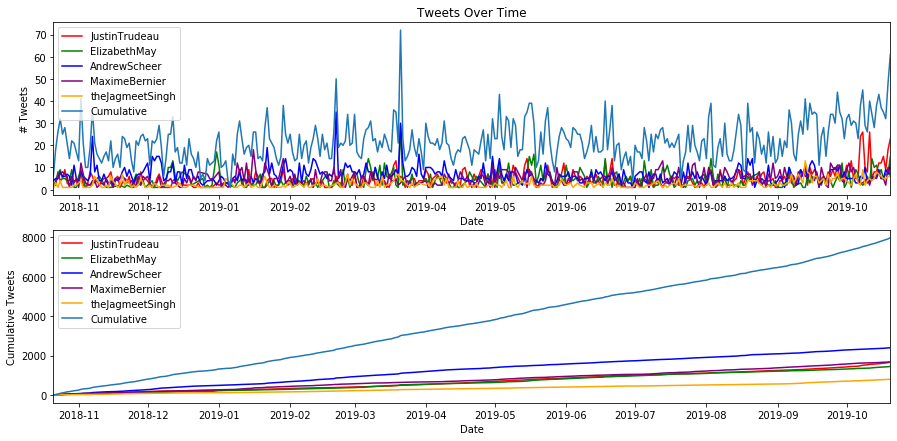

In [13]:
fig, _ = plt.subplots(figsize=(15,7))
ax = plt.subplot(2, 1, 1)
plt.title("Tweets Over Time")
plt.ylabel('# Tweets')
for username,u_df,colour in zip(usernames,frames,colours):
    u_df["Date"] = pd.to_datetime(u_df['created_at']).dt.date
    u_df = u_df.groupby(u_df["Date"])
    c_t = u_df["created_at"].count()
    c_t.plot(ax=ax,label=username,color=colour)
tweets_over_time.plot(ax=ax,label="Cumulative")
ax.legend()
ax = plt.subplot(2, 1, 2)
plt.ylabel('Cumulative Tweets')
for username,u_df,colour in zip(usernames,frames,colours):
    u_df["Date"] = pd.to_datetime(u_df['created_at']).dt.date
    u_df = u_df.groupby(u_df["Date"]).count()
    c_t = u_df["created_at"].cumsum()
    c_t.plot(ax=ax,label=username,color=colour)
cumulative_tweets.plot(ax=ax,label="Cumulative")
ax.legend()
plt.savefig("../visualizations/descriptive_charts/tweets_over_time.png")

In [25]:
frames = []
usernames = ["JustinTrudeau","ElizabethMay","AndrewScheer","MaximeBernier","theJagmeetSingh"]
for username in usernames:
    file_path = "../data/{}_retweets.csv".format(username)
    timeline_df = pd.read_csv(file_path)
    frames.append(timeline_df)
retweets_df = pd.concat(frames,sort=False) 
retweets_df.head(3)  

,original_tweet_id,retweet_id,type,created_at,source,favorite_count,retweet_count,original_author
0,1186377502907912192,1190788396441931776,retweet,Sun Nov 03 00:30:52 +0000 2019,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,1141,viewsini1
1,1186377502907912192,1189553602110603265,retweet,Wed Oct 30 14:44:14 +0000 2019,"<a href=""http://twitter.com/download/iphone"" r...",0,1141,el_mesary
2,1186377502907912192,1188026893762781184,retweet,Sat Oct 26 09:37:38 +0000 2019,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,1141,Pari95751293


In [26]:
retweets_df["Date"] = pd.to_datetime(retweets_df['created_at']).dt.date
retweets_over_time = retweets_df[["Date","retweet_id"]]
retweets_over_time["retweets"] = retweets_df["retweet_id"]
retweets_over_time = retweets_over_time.drop("retweet_id",axis=1)
retweets_over_time = retweets_over_time.groupby(retweets_over_time["Date"]).count()
cumulative_retweets = retweets_over_time["retweets"].cumsum()
cumulative_retweets.head()

/Users/student/Desktop/School/CISC500/sourceCode/thesisEnv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Date
2018-10-21     27
2018-10-22    127
2018-10-23    309
2018-10-24    564
2018-10-25    838
Name: retweets, dtype: int64

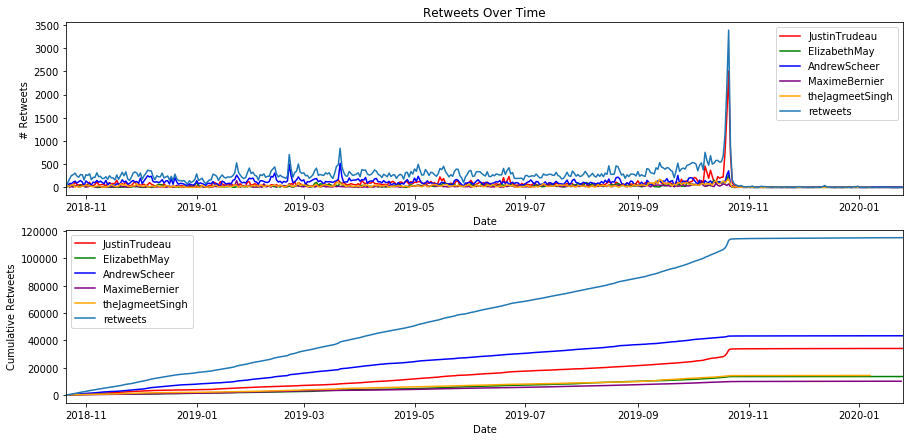

In [27]:
fig, _ = plt.subplots(figsize=(15,7))
ax = plt.subplot(2, 1, 1)
plt.title("Retweets Over Time")
plt.ylabel('# Retweets')
for username,u_df,colour in zip(usernames,frames,colours):
    u_df["Date"] = pd.to_datetime(u_df['created_at']).dt.date
    u_df = u_df.groupby(u_df["Date"])
    c_t = u_df["created_at"].count()
    c_t.plot(ax=ax,label=username,color=colour)
retweets_over_time.plot(ax=ax)
ax.legend()
ax = plt.subplot(2, 1, 2)
plt.ylabel('Cumulative Retweets')
for username,u_df,colour in zip(usernames,frames,colours):
    u_df["Date"] = pd.to_datetime(u_df['created_at']).dt.date
    u_df = u_df.groupby(u_df["Date"]).count()
    c_t = u_df["created_at"].cumsum()
    c_t.plot(ax=ax,label=username,color=colour)
cumulative_retweets.plot(ax=ax)
ax.legend()
plt.savefig("../visualizations/descriptive_charts/retweets_over_time.png")

In [0]:
total_df = total_df[total_df["lda_cluster"] != -1]
topics = total_df[["lda_cluster","id"]].groupby("lda_cluster").count()

In [0]:
# Pie chart
labels = ["Topic {}".format(ind+1) for ind in topics.index]
topic_magnitude = list(topics.id)
colors = ["#006816", "#8d34e4", "#c9a738", "#0163d0","#ee5700", "#00937e", "#ff4284","#4b5400","#ea80ff","#9f0040"][:len(topic_magnitude)]
explode = [0.05 for i in range(len(labels))]
fig1, ax = plt.subplots(figsize=(12,12))
plt.title("Tweets Per Topic\n\n")
ax.pie(topic_magnitude, colors = colors, labels=labels, autopct='%1.1f%%', explode=explode,startangle=90)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.savefig("../visualizations/descriptive_charts/topic_distribution.png")